In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
''' Model function for single slit intensity pattern
'''
def intensity_s(x, a):
    phi = (np.pi * a)/wavelength * ((x + offset)/np.sqrt((x + offset)**2 + length**2))
    return I * (np.sin(phi)/phi)**2

''' Model function for double slit diffraction pattern
'''
def intensity_d(x, a, d):
    phi_s = (np.pi * a)/wavelength * ((x + offset)/np.sqrt((x + offset)**2 + length**2))
    phi_d = (np.pi * d)/wavelength * ((x + offset)/np.sqrt((x + offset)**2 + length**2))
    return I * (np.cos(phi_d))**2 * (np.sin(phi_s)/phi_s)**2

In [3]:
wavelength = 650 * 10**(-9)     #650nm (red) light
length_s = 0.783                #distance from the sensor aperture to the laser aperture, single slit
length_d = 0.745                #distance from the sensor aperture to the laser aperture, double slit
I_s = np.array([0.27158, 1.14082, 0.02716, 3.95709, 0.07018])       #maximum intensity in corresponding single data
I_d = np.array([0.00766, 0.17700, 0.67458, 0.71563, 3.30389])       #maximum intensity in corresponding double data
#offset_s = np.array([0.06889, 0.06900, 0.06694, 0.06705, 0.07578])  #offset of maximum in corresponding single data
#offset_d = np.array([0.06939, 0.06755, 0.06939, 0.06817, 0.06928])  #offset of maximum in corresponding double data
offset_s = np.array([0.0694213, 0.0694508, 0.0675186, 0.0757648, 0.0680048])
offset_d = np.array([0.0697878, 0.0679757, 0.0693881, 0.0691909, 0.0692345])

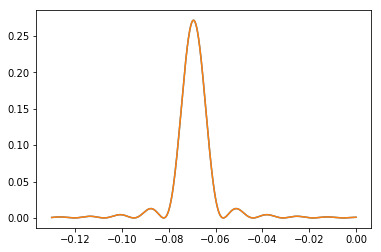

[array([4.e-05]), array([8.e-05]), array([4.e-05]), array([0.00016]), array([4.e-05])]


In [27]:
single, double, u_s, u_d = [], [], [], []
for i in range(5):
    single.append(np.empty((1000,2)))
    double.append(np.empty((1000,2)))
    u_s.append(np.empty(1000))
    u_d.append(np.empty(1000))

space = np.linspace(-0.13, 0.0, 1000)
a_s = np.array([0.00004, 0.00008, 0.00004, 0.00016, 0.00004])
a_d = np.array([[0.00004, 0.00025], [0.00004, 0.00025], [0.00004, 0.00025], [0.00004, 0.00050], [0.00008, 0.00025]])

for i in range(5):
    for j in range(1000):
        I, offset, length = I_s[i], offset_s[i], length_s
        single[i][j][0] = space[j]
        single[i][j][1] = intensity_s(space[j], a_s[i])
        I, offset, length = I_d[i], offset_d[i], length_d
        double[i][j][0] = space[j]
        double[i][j][1] = intensity_d(space[j], a_d[i][0], a_d[i][1])
        u_s[i][j] = 0.00001
        u_d[i][j] = 0.00001

single, double, u_s, u_d = np.array(single), np.array(double), np.array(u_s), np.array(u_d)

popt_s, pcov_s, popt_d, pcov_d = [0]*5, [0]*5, [0]*5, [0]*5

for i in range(5): 
    I, offset, length = I_s[i], offset_s[i], length_s
    popt_s[i], pcov_s[i] = curve_fit(intensity_s, single[i][:,0], single[i][:,1], p0=0.0004, sigma=u_s[i])
    I, offset, length = I_d[i], offset_d[i], length_d
    popt_d[i], pcov_d[i] = curve_fit(intensity_d, double[i][:,0], double[i][:,1], sigma=u_d[i])

I, offset, length = I_s[0], offset_s[0], length_s
plt.plot(space, intensity_s(space, a_s[0]))
plt.plot(space, intensity_s(space, popt_s[0]))
plt.show()
    
print(popt_s)